In [69]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df=pd.read_excel("D:\\STUDIES\\Data Science_EXCELR\\Assignments_NEW\\Decision Tree\\heart_disease.xlsx",sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df.shape

(908, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [17]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

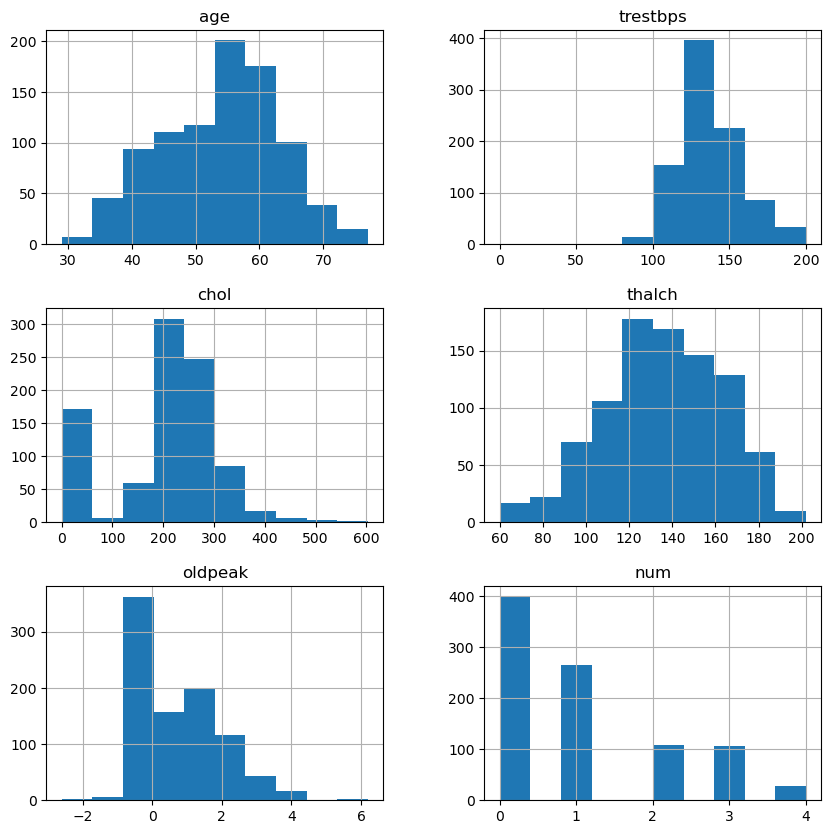

In [20]:
df.hist(figsize=(10, 10))
plt.show()

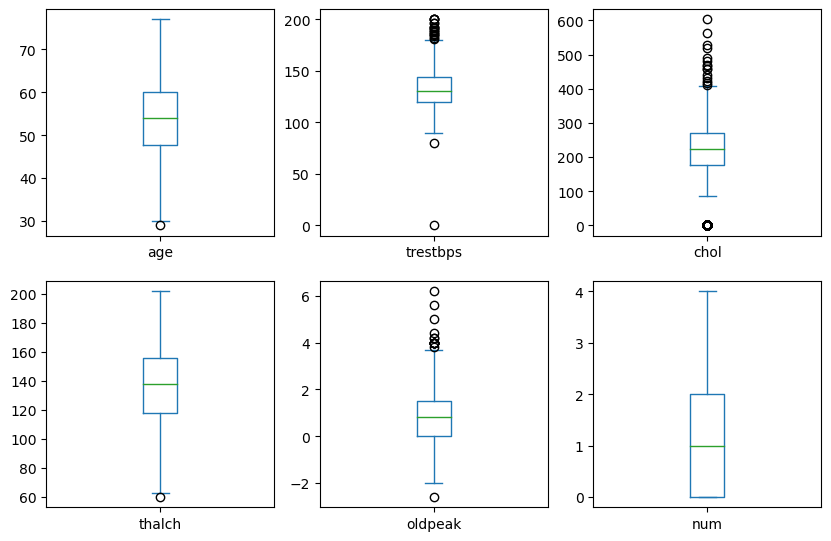

In [21]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 10))
plt.show()

In [22]:
corr_matrix = df.corr()
print(corr_matrix)


               age  trestbps      chol       fbs    thalch   oldpeak       num
age       1.000000  0.253999 -0.099967  0.176702 -0.328088  0.232718  0.326493
trestbps  0.253999  1.000000  0.117488  0.111614 -0.133360  0.152162  0.137251
chol     -0.099967  0.117488  1.000000 -0.113721  0.197907  0.028744 -0.238813
fbs       0.176702  0.111614 -0.113721  1.000000 -0.065428  0.022756  0.156268
thalch   -0.328088 -0.133360  0.197907 -0.065428  1.000000 -0.128728 -0.323058
oldpeak   0.232718  0.152162  0.028744  0.022756 -0.128728  1.000000  0.416580
num       0.326493  0.137251 -0.238813  0.156268 -0.323058  0.416580  1.000000


C:\Users\Home\AppData\Local\Temp\ipykernel_14556\1942669328.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


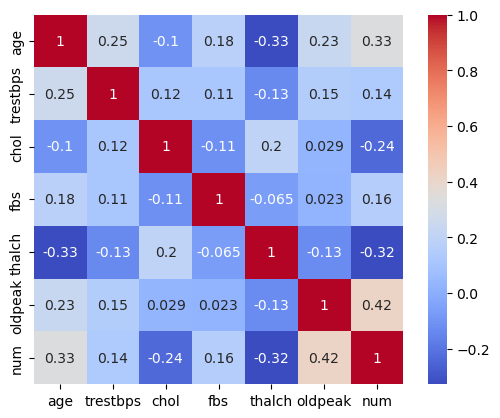

In [23]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [24]:
categorical_vars = df.select_dtypes(include=['object']).columns
print(categorical_vars)

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [35]:
le = LabelEncoder()
categorical_vars = df.select_dtypes(include=['object']).columns
for var in categorical_vars:
    df[var] = le.fit_transform(df[var])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

In [67]:
target_column = 'thal_reversable defect'

X = df.drop(target_column, axis=1)  # Features
y = df[target_column]                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        59

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

X = df.drop('thal_reversable defect', axis=1)  # Features
y = df['thal_reversable defect']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

print(classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        59

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        59

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182

Confusion Matrix:
[[123   0]
 [  0  59]]


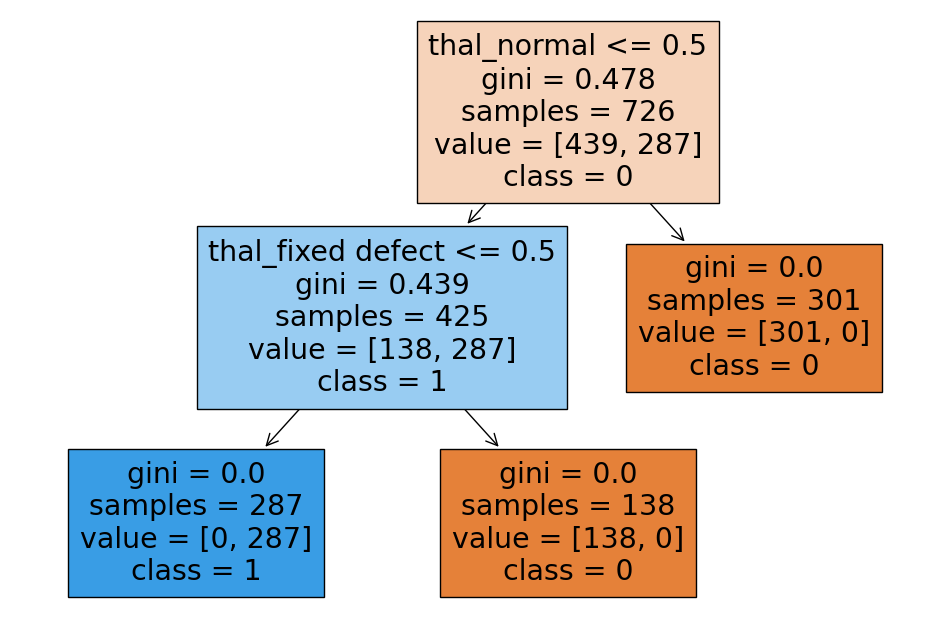

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Separate features and target variable
X = df.drop('thal_reversable defect', axis=1)  # Features
y = df['thal_reversable defect']               # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()


In [ ]:
# The decision tree model achieved 100% accuracy on the test data, demonstrating its effectiveness in predicting the target variable. With optimal hyperparameters of {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
# Accuracy: 1.0, the model showcases balanced performance across precision, recall, and F1-score, as evidenced by the classification report.
# The decision tree structure reveals key features such as [thal_fixed defect,thal_normal,restecg_lv hypertrophy,slope_upsloping,slope_flat],emphasizing their significance in determining the presence of 'thal_reversable defect'.